In [182]:
# Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as st
import numpy as np

from scipy.stats import sem

wine_file = "Resources/clean_winemag_data.csv"

In [183]:
# Create initial dataframe
wine_df =pd.read_csv(wine_file, index_col=0)
wine_df.head()

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Avidagos,NaN,Douro,Portugal,15.0,87.0,Roger Voss,@vossroger,"This is ripe and fruity, a wine that is smooth..."
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,Willamette Valley,Oregon,US,14.0,87.0,Paul Gregutt,@paulgwine,"Tart and snappy, the flavors of lime flesh and..."
3,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Reserve Late Harvest,Lake Michigan Shore,Michigan,US,13.0,87.0,Alexander Peartree,NaN,"Pineapple rind, lemon pith and orange blossom ..."
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Vintner's Reserve Wild Child Block,Willamette Valley,Oregon,US,65.0,87.0,Paul Gregutt,@paulgwine,"Much like the regular bottling from 2012, this..."
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Ars In Vitro,Navarra,Northern Spain,Spain,15.0,87.0,Michael Schachner,@wineschach,Blackberry and raspberry aromas show a typical...


## Examine number of ratings per wine variety

In [189]:
# Count unique wine types
unique_wine_types = wine_df['Type'].unique()
count_unique_wine_types = len(unique_wine_types)
print(f"There are {count_unique_wine_types} wine types.")

There are 691 wine types.


In [ ]:
# Use groupby and summary statistical methods to calculate the following properties of each wine type: 
# mean, median, variance, standard deviation, and SEM of the rating. 

mean_wine_rating = wine_df.groupby(['Type'])['Rating'].mean()
median_wine_rating = wine_df.groupby(['Type'])['Rating'].median()
var_wine_rating = wine_df.groupby(['Type'])['Rating'].var()
sd_wine_rating = wine_df.groupby(['Type'])['Rating'].std()
sem_wine_rating = wine_df.groupby(['Type'])['Rating'].sem()
count_wine_rating = wine_df.groupby(['Type'])['Rating'].count()

wine_type_df = pd.DataFrame({
    'Number of Ratings': count_wine_rating,
    'Mean Wine Rating': mean_wine_rating,
    'Median Wine Rating': median_wine_rating,
    'Wine Rating Variance': var_wine_rating,
    'Wine Rating St. Dev.': sd_wine_rating,
    'Wine Rating St. Error': sem_wine_rating
})

In [ ]:
# Sort descending by Number of Ratings
wine_type_df = wine_type_df.sort_values('Number of Ratings', ascending=False).reset_index()

# Create new DataFrame of top 10 wine types with most number of ratings
wine_type_ratings_df = wine_type_df.head(10)

In [ ]:
# Add column of wine color
list_of_wine_colors = ["Red","White","Red","Red","Red","White","White","Red","Pink","Red"]
wine_type_ratings_df['Color'] = list_of_wine_colors

# Move Color column after Type
wine_type_ratings_df = wine_type_ratings_df[['Type','Color','Number of Ratings','Mean Wine Rating','Median Wine Rating','Wine Rating Variance','Wine Rating St. Dev.','Wine Rating St. Error']]
wine_type_ratings_df

C:\Users\User\AppData\Local\Temp\ipykernel_6092\560243968.py:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  red_patch = mpatches.Patch(color='darkred', edgecolor='black', label="Red")
C:\Users\User\AppData\Local\Temp\ipykernel_6092\560243968.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  white_patch = mpatches.Patch(color='lemonchiffon', edgecolor='black', label="White")
C:\Users\User\AppData\Local\Temp\ipykernel_6092\560243968.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  pink_patch = mpatches.Patch(color='palevioletred', edgecolor='black', label="Pink")


Text(0.5, 1.0, 'Top 10 Wine Types by Number of Ratings')

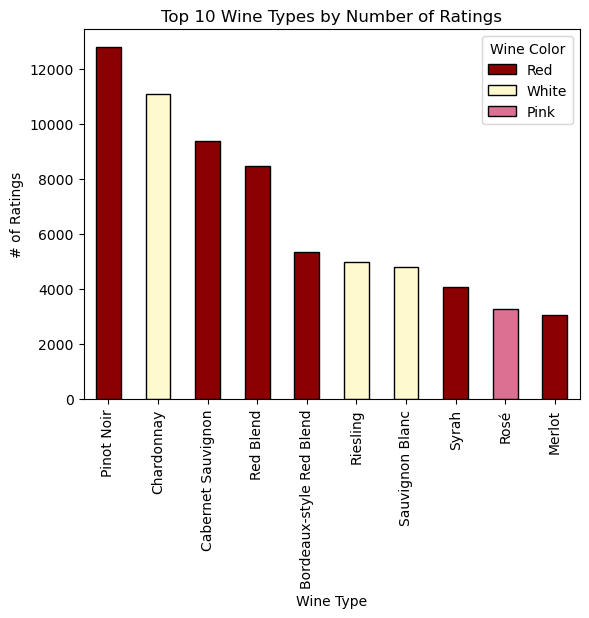

In [185]:
# Plot bar chart of top 10 wine types with most number of ratings

# Set bar colors based on wine color
wine_colors = wine_type_ratings_df['Color']
wine_chart_colors = [{c=="Red":'darkred',c=="White":'lemonchiffon',c=="Pink":'palevioletred'}[True] for c in wine_colors]

# Bar chart setup
wine_type_bar_chart = wine_type_ratings_df.plot.bar(x='Type', y='Number of Ratings', rot=90, color=wine_chart_colors, edgecolor='black')

# Set legend based on wine color using mpatches
red_patch = mpatches.Patch(color='darkred', edgecolor='black', label="Red")
white_patch = mpatches.Patch(color='lemonchiffon', edgecolor='black', label="White")
pink_patch = mpatches.Patch(color='palevioletred', edgecolor='black', label="Pink")
handles = [red_patch, white_patch, pink_patch]

for i, handle in enumerate(handles):
    handle.set_edgecolor('black')

# Plot bar chart
plt.legend(
    title = "Wine Color",
    handles = handles, 
    loc = 'best'
)

plt.xlabel("Wine Type")
plt.ylabel("# of Ratings")
plt.title("Top 10 Wine Types by Number of Ratings")

C:\Users\User\AppData\Local\Temp\ipykernel_6092\3267855200.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  red_patch = mpatches.Patch(color='darkred', edgecolor='black', label="Red")
C:\Users\User\AppData\Local\Temp\ipykernel_6092\3267855200.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  white_patch = mpatches.Patch(color='lemonchiffon', edgecolor='black', label="White")
C:\Users\User\AppData\Local\Temp\ipykernel_6092\3267855200.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  pink_patch = mpatches.Patch(color='palevioletred', edgecolor='black', label="Pink")


Text(0.5, 1.0, 'Top 10 Wine Types by Number of Ratings (sorted by correlation)')

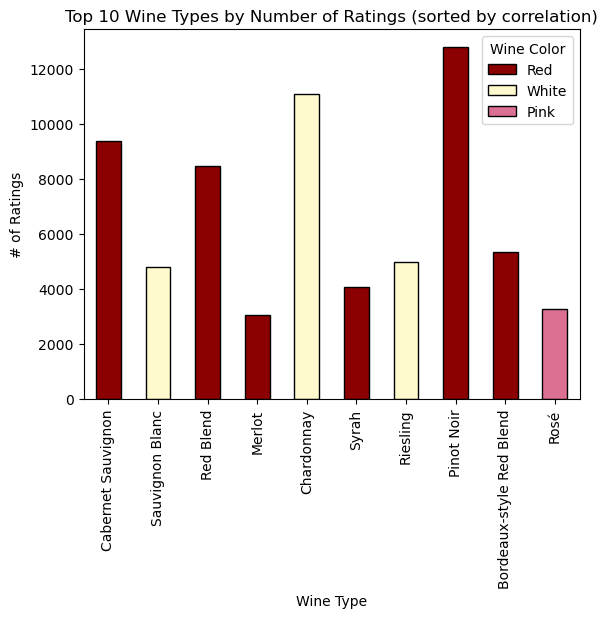

In [188]:
# Same bar chart as above, but sorted by correlation (for slide deck)
sort_dict = {'Cabernet Sauvignon':0, 
             'Sauvignon Blanc':1,
             'Red Blend':2,
             'Merlot':3,
             'Chardonnay':4,
             'Syrah':5,
             'Riesling':6,
             'Pinot Noir':7,
             'Bordeaux-style Red Blend':8,
             'Rosé':9}
corr_sorted_df = wine_type_ratings_df.iloc[wine_type_ratings_df['Type'].map(sort_dict).sort_values().index]

# Set bar colors based on wine color
wine_colors = corr_sorted_df['Color']
wine_chart_colors = [{c=="Red":'darkred',c=="White":'lemonchiffon',c=="Pink":'palevioletred'}[True] for c in wine_colors]

# Bar chart setup
corr_wine_type_bar_chart = corr_sorted_df.plot.bar(x='Type', y='Number of Ratings', rot=90, color=wine_chart_colors, edgecolor='black')

# Set legend based on wine color using mpatches
red_patch = mpatches.Patch(color='darkred', edgecolor='black', label="Red")
white_patch = mpatches.Patch(color='lemonchiffon', edgecolor='black', label="White")
pink_patch = mpatches.Patch(color='palevioletred', edgecolor='black', label="Pink")
handles = [red_patch, white_patch, pink_patch]

for i, handle in enumerate(handles):
    handle.set_edgecolor('black')

# Plot bar chart
plt.legend(
    title = "Wine Color",
    handles = handles, 
    loc = 'best'
)

plt.xlabel("Wine Type")
plt.ylabel("# of Ratings")
plt.title("Top 10 Wine Types by Number of Ratings (sorted by correlation)")

# Deeper Dive into California Wine Types

In [211]:
# Create new DataFrame with only wines from California
cali_df = wine_df[wine_df['Province'] == "California"].reset_index(drop=True)

# Count unique wine types from California
count_cali_unique_wine_types = len(cali_df['Type'].unique())
print(f"There are {count_cali_unique_wine_types} wine types.")

There are 193 wine types.


In [212]:
# Create DataFrame of only California wine types and number of ratings
count_cali_wine_rating = cali_df.groupby(['Type'])['Rating'].count()

cali_wine_type_df = pd.DataFrame({'Number of Ratings': count_cali_wine_rating})

# Sort descending by Number of Ratings
cali_wine_type_df = cali_wine_type_df.sort_values('Number of Ratings', ascending=False).reset_index()

# Show only top 10 wine types based on number of ratings
top_10_cali_wine_type_df = cali_wine_type_df.head(10)

# Calculate count of total ratings from those not in the top 10 wine types
cali_other_wines = pd.Series(cali_wine_type_df['Number of Ratings'].sum() - top_10_cali_wine_type_df['Number of Ratings'].sum())
cali_grouped_df = top_10_cali_wine_type_df.append(cali_other_wines,ignore_index=True)

# cali_grouped_df DataFrame clean up
cali_grouped_df['Type'] = cali_grouped_df['Type'].fillna('Others')
cali_grouped_df['Number of Ratings'] = cali_grouped_df['Number of Ratings'].fillna('7359.0')
cali_grouped_df['Number of Ratings']=cali_grouped_df['Number of Ratings'].astype(str)

C:\Users\User\AppData\Local\Temp\ipykernel_6092\2107997957.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cali_grouped_df = top_10_cali_wine_type_df.append(cali_other_wines,ignore_index=True)


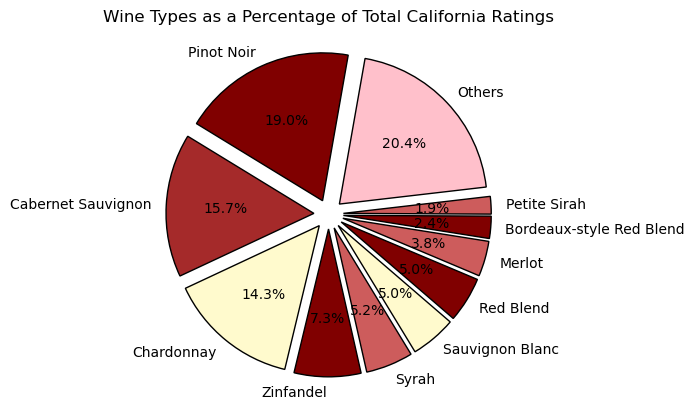

In [229]:
# Create pie chart of California wine types
labels = cali_grouped_df['Type']
sizes = cali_grouped_df['Number of Ratings']
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

colors = ['maroon', 'brown', 'lemonchiffon', 'maroon', 'indianred', 'lemonchiffon', 'maroon', 'indianred', 'maroon', 'indianred', 'pink']

cali_wine_pie_chart = plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", startangle=80, wedgeprops = {"edgecolor" : "black"})
plt.title("Wine Types as a Percentage of Total California Ratings")
plt.show()

# Correlation between sommeliers' number of ratings and average wine rating and/or average wine price

In [210]:
# Create list of unique sommeliers
unique_soms = list(wine_df['Sommelier'].unique())

# Remove null value ("nan") from list of unique sommeliers
unique_soms.pop(8)

# Count number of unique sommeliers
count_unique_soms = len(unique_soms)
print(f"There are {count_unique_soms} sommeliers.")

There are 19 sommeliers.


In [198]:
# Use groupby and summary statistical methods to calculate the following properties of each sommelier rating: 
# mean, median, variance, standard deviation, and SEM of the rating. 

count_som_rating = wine_df.groupby(['Sommelier'])['Rating'].count()
mean_som_rating = wine_df.groupby(['Sommelier'])['Rating'].mean()
median_som_rating = wine_df.groupby(['Sommelier'])['Rating'].median()
highest_som_rating = wine_df.groupby(['Sommelier'])['Rating'].max()
lowest_som_rating = wine_df.groupby(['Sommelier'])['Rating'].min()
mean_som_price = wine_df.groupby(['Sommelier'])['Price'].mean()
median_som_price = wine_df.groupby(['Sommelier'])['Price'].median()
highest_som_price = wine_df.groupby(['Sommelier'])['Price'].max()
lowest_som_price = wine_df.groupby(['Sommelier'])['Price'].min()


som_df = pd.DataFrame({
    'Number of Ratings': count_som_rating,
    'Mean Wine Rating': mean_som_rating,
    'Median Wine Rating': median_som_rating,
    'Highest Wine Rating': highest_som_rating,
    'Lowest Wine Rating': lowest_som_rating,
    'Mean Wine Price': mean_som_price,
    'Median Wine Price': median_som_price,
    'Highest Wine Price': highest_som_price,
    'Lowest Wine Price': lowest_som_price
}).reset_index()

Text(0.5, 1.0, 'Highest and Lowest Wine Ratings by Sommelier')

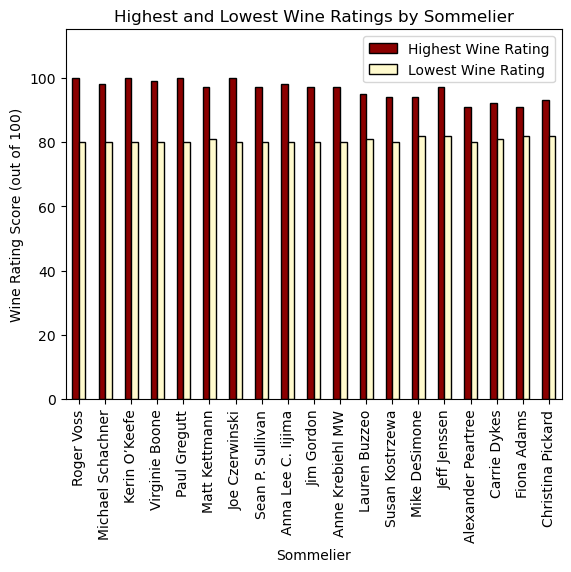

In [199]:
# Show bar graph of highest and lowest wine ratings by sommelier, sorted by number of ratings
sorted_som_df = som_df.sort_values('Number of Ratings', ascending=False)

# Set bar colors based on wine color
som_ratings_colors = ['darkred', 'lemonchiffon']

# Bar chart setup
som_ratings_bar_chart = sorted_som_df.plot.bar(x='Sommelier', y=['Highest Wine Rating', 'Lowest Wine Rating'], rot=90, color=som_ratings_colors, edgecolor='black')

plt.ylim(0, 115)
plt.xlabel("Sommelier")
plt.ylabel("Wine Rating Score (out of 100)")
plt.title("Highest and Lowest Wine Ratings by Sommelier")

Text(0.5, 1.0, 'Highest and Lowest Wine Prices by Sommelier')

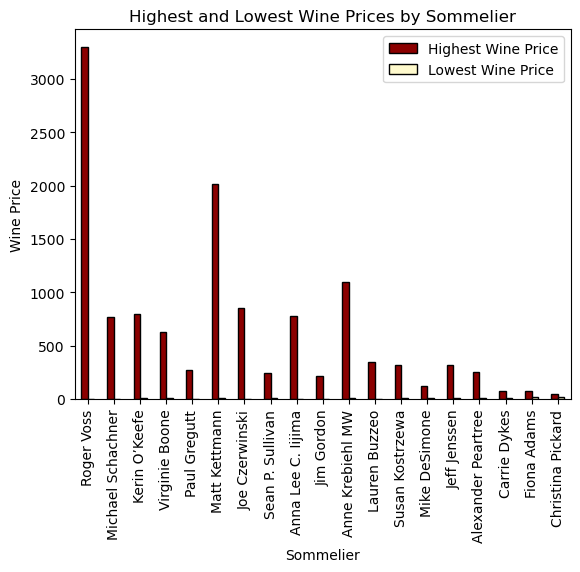

In [200]:
# Show bar graph of highest and lowest wine prices by sommelier, sorted by number of ratings

# Set bar colors based on wine color
som_ratings_colors = ['darkred', 'lemonchiffon']

# Bar chart setup
som_prices_bar_chart = sorted_som_df.plot.bar(x='Sommelier', y=['Highest Wine Price', 'Lowest Wine Price'], rot=90, color=som_ratings_colors, edgecolor='black')

plt.xlabel("Sommelier")
plt.ylabel("Wine Price")
plt.title("Highest and Lowest Wine Prices by Sommelier")

In [68]:
# Define a function to create Linear Regression plots for som_df 
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The correlation is {rvalue}")
    plt.scatter(x, y, c="darkred")
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=13,color="red")

The correlation is 0.27635928298995294


Text(0.5, 1.0, 'Correlation between Number of Ratings and Avg. Wine Rating')

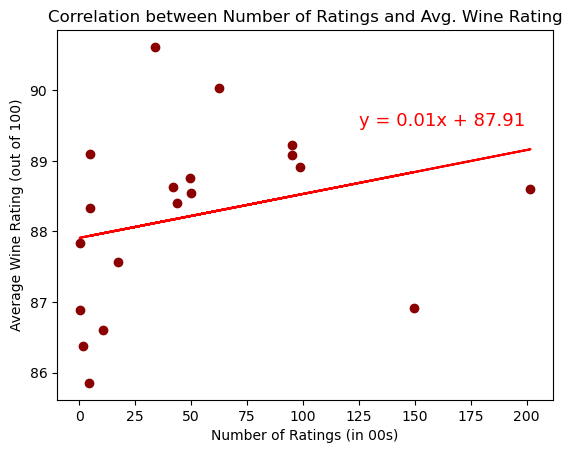

In [201]:
# Using Linear Regression function, chart correlation between Number of Ratings and Average Wine Rating 
equation = linear_regression(som_df['Number of Ratings'] / 100, som_df['Mean Wine Rating'])

annotate(equation, 125, 89.5)

plt.xlabel("Number of Ratings (in 00s)")
plt.ylabel("Average Wine Rating (out of 100)")
plt.title("Correlation between Number of Ratings and Avg. Wine Rating")

The correlation is 0.5062098767761122


Text(0.5, 1.0, 'Correlation between Number of Ratings and Avg. Wine Price')

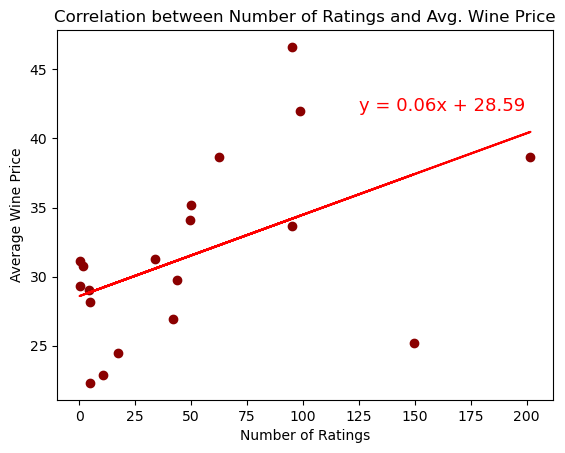

In [202]:
# Using Linear Regression function, chart correlation between Number of Ratings and Average Wine Price
equation = linear_regression(som_df['Number of Ratings'] / 100, som_df['Mean Wine Price'])

annotate(equation, 125, 42)

plt.xlabel("Number of Ratings")
plt.ylabel("Average Wine Price")
plt.title("Correlation between Number of Ratings and Avg. Wine Price")

## Deeper Dive into Sommelier Roger Voss

The correlation is 0.41237518129721434


Text(0.5, 1.0, "Roger Voss' Correlation between Wine Rating and Price")

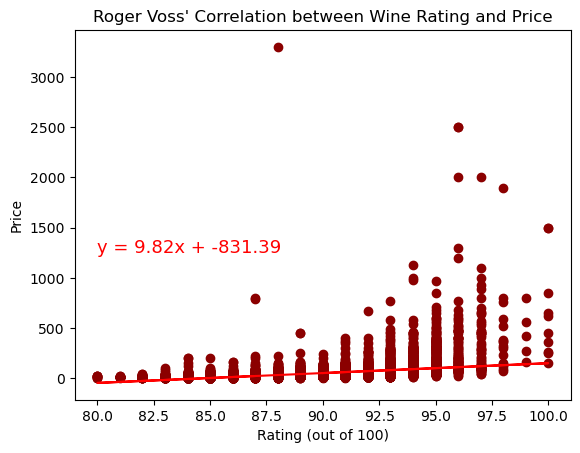

In [207]:
# Create new DataFrame with only Roger Voss' data
roger_voss_df = wine_df[wine_df['Sommelier'] == "Roger Voss"].reset_index(drop=True)

# Using Linear Regression function, chart correlation between Rating and Wine Price for Roger Voss
equation = linear_regression(roger_voss_df['Rating'], roger_voss_df['Price'])

annotate(equation, 80, 1250)

plt.xlabel("Rating (out of 100)")
plt.ylabel("Price")
plt.title(f"Roger Voss' Correlation between Wine Rating and Price")

The lower quartile of wine prices is: 15.0
The upper quartile of wine prices is: 40.0
The interquartile range of wine is: 25.0
The the median of wine is: 22.0 
Values below -22.5 could be outliers.
Values above 77.5 could be outliers.


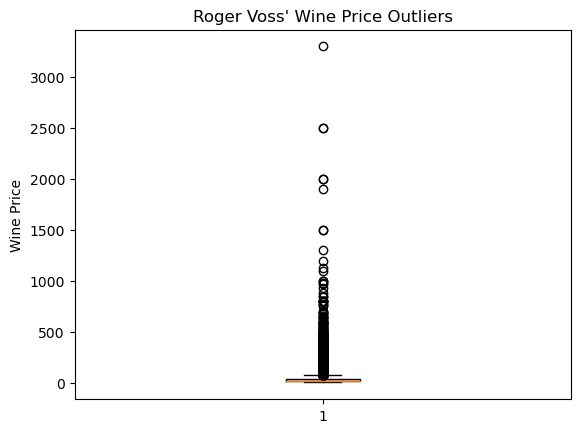

In [206]:
# Create new Roger Voss DataFrame sorted descending by wine price 
sorted_roger_voss_df = roger_voss_df.sort_values('Price', ascending=False).reset_index()

# Determine which wines are outliers
price = sorted_roger_voss_df['Price']
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of wine prices is: {lowerq}")
print(f"The upper quartile of wine prices is: {upperq}")
print(f"The interquartile range of wine is: {iqr}")
print(f"The the median of wine is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Plot box and whiskers chart to show outliers (ugly chart)
wine_prices = sorted_roger_voss_df['Price']

fig1, ax1 = plt.subplots()
ax1.set_title("Roger Voss' Wine Price Outliers")
ax1.set_ylabel("Wine Price")
ax1.boxplot(wine_prices)
plt.show()

The correlation is 0.5095872143525


Text(0.5, 1.0, "Roger Voss' Correlation between Wine Rating and Price (sample of 50)")

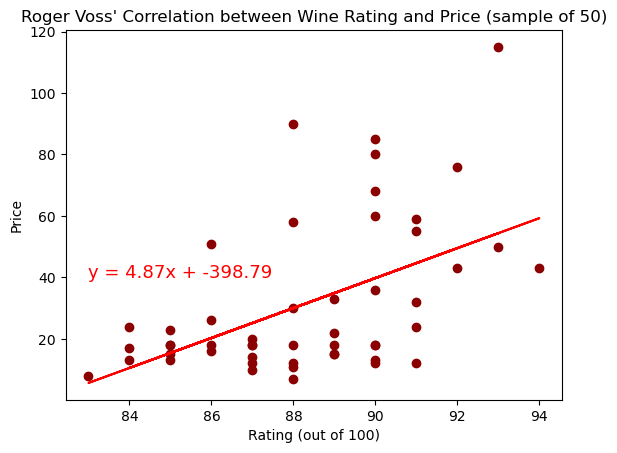

In [86]:
# Smaller sample of Roger Voss' data
roger_voss_sample_df = roger_voss_df.sample(50)

# Using earlier linear_regression function, find correlation between Rating and Wine Price for Roger Voss's sample data set
equation = linear_regression(roger_voss_sample_df['Rating'], roger_voss_sample_df['Price'])

annotate(equation, 83, 40)

plt.xlabel("Rating (out of 100)")
plt.ylabel("Price")
plt.title(f"Roger Voss' Correlation between Wine Rating and Price (sample of 50)")

## Sommeliers and Twitter

In [208]:
# Create DataFrame only of sommeliers' names and Twitter handles
som_twitter_df = wine_df[['Sommelier','Sommelier Twitter Handle']].copy()
som_twitter_df = som_twitter_df.sort_values('Sommelier', ascending=True)
som_twitter_df = som_twitter_df.drop_duplicates(subset='Sommelier', keep="first").reset_index()
som_twitter_df = som_twitter_df.drop(som_twitter_df.columns[0], axis=1)
som_twitter_df = som_twitter_df.fillna('N/A')

# Merge som_df and som_twitter_df
som_df = pd.merge(som_df, som_twitter_df, on='Sommelier', how="inner")

# Count how many sommeliers do and do not have Twitter accounts
soms_w_twitter = len(som_df[som_df['Sommelier Twitter Handle'].str.contains("@")])
soms_wo_twitter = len(som_df[som_df['Sommelier Twitter Handle'].str.contains("N/A")])

print(f" There are {soms_w_twitter} sommeliers with Twitter accounts, and {soms_wo_twitter} sommeliers without Twitter accounts.")

 There are 16 sommeliers with Twitter accounts, and 3 sommeliers without Twitter accounts.


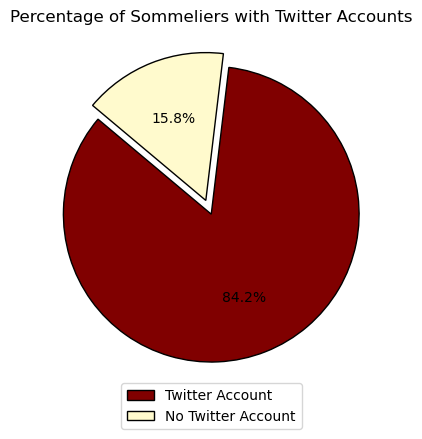

In [230]:
# Create pie chart of sommeliers that have and don't have Twitter accounts

labels = ["Twitter Account", "No Twitter Account"]
sizes = [soms_w_twitter, soms_wo_twitter]
colors = ['maroon', 'lemonchiffon']
explode = (0, 0.1)

som_twitter_pie_chart = plt.pie(sizes, colors=colors, explode=explode, autopct="%1.1f%%", startangle=140,
        wedgeprops = {"edgecolor" : "black"}
)
plt.title("Percentage of Sommeliers with Twitter Accounts")
plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5,-0.1))
plt.show()